In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [48]:
# Function to scrape job listings from Indeed.com

def scrape_indeed_jobs(keyword, location, max_pages=5):
    base_url = f'https://www.indeed.com/jobs?q={keyword}&l={location}'
    job_data = []

    for page in range(max_pages):
        url = f"{base_url}&start={page * 10}"
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            job_listings = soup.find_all('div', class_='jobsearch-SerpJobCard')

            for job in job_listings:
                title = job.find('a', class_='jobtitle').text.strip()
                company = job.find('span', class_='company').text.strip()
                location = job.find('div', class_='recJobLoc').get('data-rc-loc')
                job_data.append([title, company, location])

    return job_data

# Main function to scrape and save data to an Excel file
def main():
    keyword = "Python+developer"
    location = "YourLocation"  # Change this to your preferred location
    max_pages = 5  # Adjust the number of pages to scrape

    job_data = scrape_indeed_jobs(keyword, location, max_pages)

    # Create a Pandas DataFrame to store the scraped data
    df = pd.DataFrame(job_data, columns=['Title', 'Company', 'Location'])

    # Save the data to an Excel file
    output_file = "indeed_jobs.xlsx"
    df.to_excel(output_file, index=False, engine='openpyxl')
    print(f"Scraped job listings saved to {output_file}")

if __name__ == "__main__":
    main()


Scraped job listings saved to indeed_jobs.xlsx


In [49]:
import pandas as pd

data = {
    'City': ['Agra', 'Noida', 'Delhi', 'Pune', 'Gurugram'],
    'Average Salary': [95000, 105000, 90000, 85000, 92000]
}

df = pd.DataFrame(data)


In [50]:
df.head()

,City,Average Salary
0,Agra,95000
1,Noida,105000
2,Delhi,90000
3,Pune,85000
4,Gurugram,92000


In [51]:
df.shape

(5, 2)

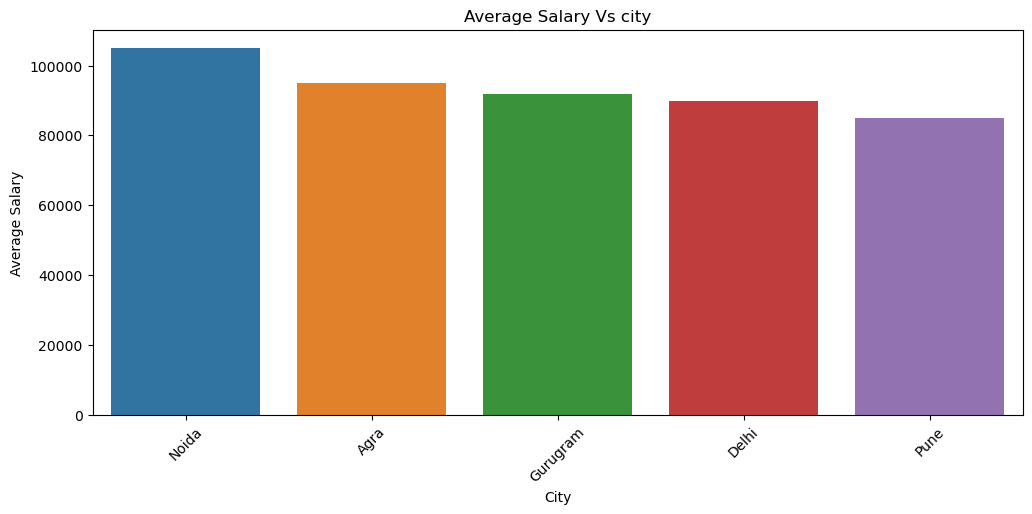

In [53]:
plt.figure(figsize = (12, 5))

sns.barplot(data = df, x  = 'City', y = 'Average Salary')

plt.title('Average Salary Vs city')

# Sort the DataFrame by Average Salary in descending order
df = df.sort_values(by="Average Salary", ascending=False)

plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

# Average Salary 93400